# Building multi layered perceptron with Keras

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


standardise the values

In [3]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [5]:
class_names[y_train[0]]

'Ankle boot'

## creating the model

the set helps to make reproducable weights and biases

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(), # converts the multi dimentional array into a single dimentional array
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

displays information about the layer.

**Param #** is the number of weights and biases. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.layers

In [9]:
hiden1 = model.layers[1]

In [10]:
weights, biases = hiden1.get_weights()

In [11]:
weights, biases

(array([[ 0.05573536,  0.068113  , -0.02153528, ...,  0.00289666,
          0.0508703 ,  0.06834269],
        [ 0.02630142, -0.01417391, -0.02928493, ..., -0.01686492,
         -0.03878238,  0.07121718],
        [-0.05511799,  0.0189532 ,  0.05111496, ..., -0.05924071,
         -0.0359749 ,  0.01012266],
        ...,
        [-0.01667378, -0.04074252, -0.04707516, ..., -0.03682985,
         -0.02744276,  0.01410635],
        [-0.03576107, -0.02590617, -0.00681389, ..., -0.04471757,
          0.04541091, -0.05090051],
        [ 0.01062726, -0.03133378,  0.02517961, ..., -0.05886275,
         -0.06709022, -0.03523832]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## Compiling the model

This code uses the "sparse_categorical_crossentropy" loss because the labels are sparse and the classes are exclusive. If the labels were one-hot vectors, the "categorical_crossentropy" loss would be used instead. For binary classification or multilabel binary classification, the "sigmoid" activation function and "binary_crossentropy" loss would be used instead of "softmax".

the default learning rate for the optimizer is 0.01

In [12]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

## model training

the default batch size is 32

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=100)

Epoch 1/30
550/550 [==============================] - 3s 4ms/step - loss: 0.9927 - accuracy: 0.6879 - val_loss: 0.6597 - val_accuracy: 0.7882
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 0.6097 - accuracy: 0.7990 - val_loss: 0.5489 - val_accuracy: 0.8162
Epoch 3/30
550/550 [==============================] - 2s 4ms/step - loss: 0.5347 - accuracy: 0.8187 - val_loss: 0.4968 - val_accuracy: 0.8272
Epoch 4/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4972 - accuracy: 0.8318 - val_loss: 0.4703 - val_accuracy: 0.8362
Epoch 5/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4742 - accuracy: 0.8373 - val_loss: 0.4592 - val_accuracy: 0.8402
Epoch 6/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4577 - accuracy: 0.8407 - val_loss: 0.4680 - val_accuracy: 0.8314
Epoch 7/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4437 - accuracy: 0.8468 - val_loss: 0.4367 - val_accuracy: 0.8482
Epoch 

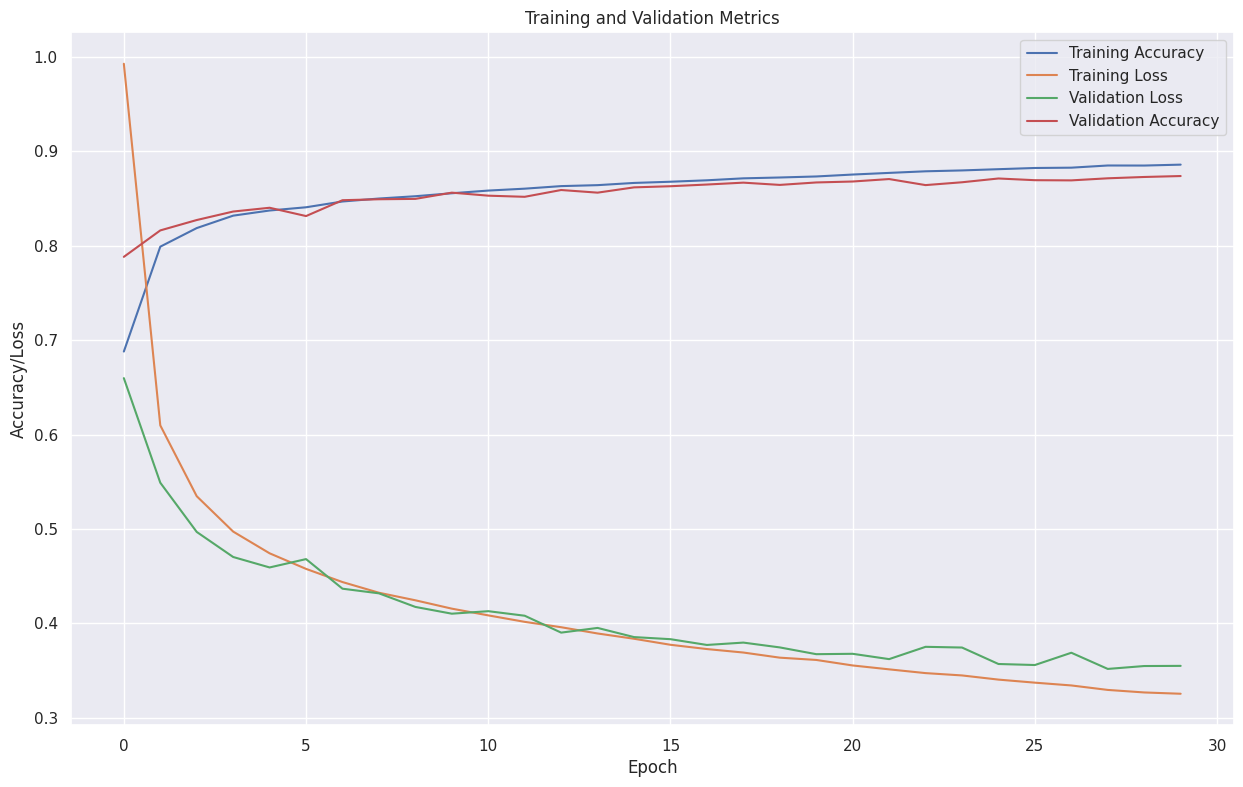

In [22]:
plt.figure(figsize=(15, 9))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [1]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

## optimal hyperparameters

In [2]:
model.save('fashion_mnist_model.h5')

NameError: name 'model' is not defined